In [14]:
!pip install ydata-profiling

     ---------------------------------------- 0.0/357.5 kB ? eta -:--:--
     -------------------------------------- 357.5/357.5 kB 7.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/102.7 kB ? eta -:--:--
     -------------------------------------- 102.7/102.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/663.4 kB ? eta -:--:--
     ------------------------------------- 663.4/663.4 kB 21.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
     ---------------------------------------- 78.3/78.3 kB ? eta 0:00:00
     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ------------------------------------- 293.3/293.3 kB 17.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ----- ---------------------------------- 1.2/9.2 MB 25.7 MB/s eta

In [10]:
!pip install -U scikit-learn

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     -- ------------------------------------- 0.5/9.2 MB 15.9 MB/s eta 0:00:01
     ----- ---------------------------------- 1.3/9.2 MB 13.9 MB/s eta 0:00:01
     --------- ------------------------------ 2.2/9.2 MB 15.6 MB/s eta 0:00:01
     -------------- ------------------------- 3.2/9.2 MB 17.2 MB/s eta 0:00:01
     ------------------- -------------------- 4.4/9.2 MB 18.9 MB/s eta 0:00:01
     ------------------------ --------------- 5.7/9.2 MB 20.4 MB/s eta 0:00:01
     ------------------------------ --------- 7.1/9.2 MB 21.7 MB/s eta 0:00:01
     ---------------------------------- ----- 8.0/9.2 MB 21.4 MB/s eta 0:00:01
     ---------------------------------------  9.1/9.2 MB 21.4 MB/s eta 0:00:01
     ---------------------------------------- 9.2/9.2 MB 20.3 MB/s eta 0:00:00


In [146]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
from scipy.stats.mstats import winsorize
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## Skeleton 

def fetch_data():
    return

def transform():
    return

def augment():
    return

def create_features():

    # Hypothesis 1:


    # Hypothesis 2:


    return

def prepare_testing():
    return


test_df = OLS_regression()


result_df = evaluate_oos_signal(test_df)
display(result_df)




In [2]:
def profile_report(df):
    profile = ProfileReport(df, title="Profiling Report")
    return profile

def check_nulls(df):
    print(df.dtypes)
    print(df.isnull().sum())

def check_count(df):
    print(df.count())

def df_winsorize(df, features, lower=0.02, upper=0.05):
    for v in features:
        df[v] = winsorize(df[v], limits = [lower, upper])

    return df

In [168]:
def universe_plot(df, date_col, sid_col):
    df.groupby([date_col])[sid_col].count().plot()


def scale_columns(df, features):
    scaler = MinMaxScaler()
    df[features] = scaler.fit_transform(df[features])
    return df

def create_dummies(df, features, dtype=float):
    for v in features:
        one_hot = pd.get_dummies(df[v],dtype=dtype)
        df = df.join(one_hot)
        df = df.drop(v, axis=1)
    return df
    
# Keeping it very simple with OLS
def OLS_regression(df, X_list, y_name, test_size=0.3):
    df = df.dropna()
    assert len(df) <= 10000

    X = df[X_list]
    y = df[y_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    model = sm.OLS(y_train, X_train)
    results = model.fit()
    display(results.summary())
    y_val_pred = results.predict(X_test)
    test_all_df = df.loc[X_test.index]
    test_all_df['signal'] = y_predict
    return test_all_df


# Trying SVR
# No hyper parameter tuning for now
def svr(df, X_list, y_name, test_size=0.3):
    df = df.dropna()
    assert len(df) <= 10000

    X = df[X_list]
    y = df[y_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    model = SVR()
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_test)
    test_all_df = df.loc[X_test.index]
    test_all_df['signal'] = y_predict
    return test_all_df

def evaluate_oos_signal(test_df, signal_col='signal', ground_truth='Y', group_column='Year'):
    signal_results_grouped = []
    for group in test_df[group_column].unique():     
        df = test_df.loc[(test_df[group_column]==group)]
        assert len(df) >= 100
        X = df['signal']
        y = df[ground_truth]
    
        # check the signal with actual via an OLS regression again
        X_test = sm.add_constant(X)
        
        model = sm.OLS(y, X_test)
        results = model.fit()
        
        df['error'] = df[ground_truth] - df['signal']
        df['hit'] = (np.sign(test_all_df['signal']) == np.sign(test_all_df[ground_truth])).mean()
        p_value = stats.shapiro(df['signal'].dropna()).pvalue
        group_result = [group,len(df), results.rsquared, results.pvalues,  df['error'].mean(), df['hit'].mean(),p_value]
        signal_results_grouped.append(group_result)
    
    test_result = pd.DataFrame(signal_results_grouped, columns=[group_column,'samples','R2','pvalue','mae', 'hit_rate','shapiro-wilk'])
    return test_result

def plot_signal_quantile(df, date_col = 'date', signal_col = 'signal'):
    display(df.groupby([date_col])[signal_col].quantile([0.1,0.9]).reset_index().pivot(index=date_col, columns='level_1', values=signal_col).reset_index().set_index(date_col).plot())


def plot_histogram_signal(df,signal_col='signal',bins=20):
    display(df['signal'].plot(kind='hist', bins=bins))
    





In [170]:
df = pd.read_csv('data.csv')

In [171]:
df = df_winsorize(df,['MSRP'])

In [112]:
p = profile_report(df)
p.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

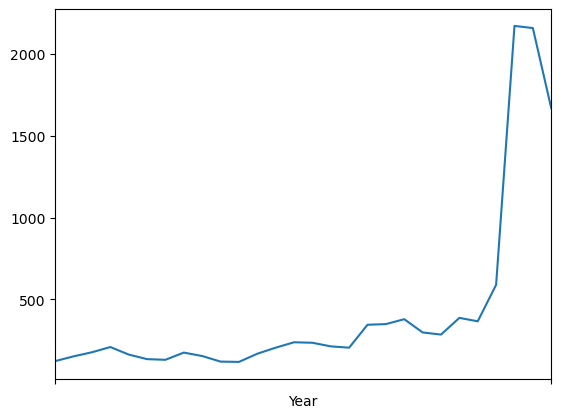

In [174]:
df['Year'] = pd.to_datetime(df['Year'])
universe_plot(df,'Year','Make')

In [176]:
df = create_dummies(df, ['Vehicle Style','Driven_Wheels'])

X_list = ['city mpg','Popularity', '2dr Hatchback', '2dr SUV', '4dr Hatchback',
       '4dr SUV', 'Cargo Minivan', 'Cargo Van', 'Convertible',
       'Convertible SUV', 'Coupe', 'Crew Cab Pickup', 'Extended Cab Pickup',
       'Passenger Minivan', 'Passenger Van', 'Regular Cab Pickup', 'Sedan',
       'Wagon', 'all wheel drive', 'four wheel drive', 'front wheel drive',
       'rear wheel drive']
y_name = 'MSRP'

df = scale_columns(df,['city mpg','Popularity', 'MSRP'])
test_size =0.3 
df = df.dropna()

test_df = svr(df,X_list, y_name, test_size)


In [177]:
result_df = evaluate_oos_signal(test_df, 'signal','MSRP', group_column='Vehicle Size')

In [178]:
result_df

Vehicle Size  samples        R2  \
0        Large      710  0.536819   
1      Compact      782  0.420754   
2      Midsize      934  0.184598   

                                              pvalue           mae  hit_rate  \
0  const      3.642927e-08
signal    1.937365e-12... -37649.405170       1.0   
1  const     1.294912e-01
signal    1.443619e-94
... -36418.547464       1.0   
2  const     1.070651e-19
signal    3.028119e-43
... -39898.373392       1.0   

   shapiro-wilk  
0  6.770940e-10  
1  1.369298e-23  
2  5.889704e-16